# Import and Setup

In [5]:
#import library yang diperlukan
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from wordcloud import WordCloud
from collections import Counter

In [2]:
!pip install tensorflow matplotlib seaborn wordcloud ipywidgets

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached pyparsing-3.2.3-py3-none-any.whl.metadata (5.0 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached traitlets-5.14.3-py3-none-any.whl.metadata (10 kB)
  Using cached decorator-5.2.1-py3-none-any.whl.metadata (3.9 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached matplotlib_inline-0.1.7-py3-none-any.whl.metadata (3.9 kB)
  Using cached prompt_toolkit-3.0.51-py3-none-any.whl.metadata (6.4 kB)
  Using cached stack_data-0.6.3-py3-none-any.whl.metadata (18 kB)
  Using cached pytz-2025.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached tzdata-2025.2-py2.py3-none-any.whl.metadata (1.4 kB)
  Using cached parso-0.8.4-py2.py3-none-any.whl.metadata (7.7 kB)
  Using cached wcwidth-0.2.13-py2.py3-none-any.whl.metadata (14 kB)
  Using cached executing-2.2.0-py2.py3-none-any.whl.metadata (8.9 kB


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


# Load Dataset

In [ ]:
df2 = pd.read_csv("../data/counselchat-data.csv")
print(df2.columns)

Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes'],
      dtype='object')


In [7]:
df2

,questionID,questionTitle,questionText,questionUrl,topics,therapistName,therapistUrl,answerText,upvotes
0,5566fab2a64752d71ec3ca69,Escalating disagreements between mother and wife,My wife and mother are having tense disagreeme...,https://counselchat.com/questions/escalating-d...,Family Conflict,"Kristi King-Morgan, LMSW",https://counselchat.com/therapists/kristi-king...,<p>What you are describing is something psycho...,0
1,5566f94fa64752d71ec3ca64,I'm addicted to smoking. How can I stop?,"I'm planning to have baby, so I have to quit s...",https://counselchat.com/questions/i-m-addicted...,"Substance Abuse,Addiction",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi. Good for you in planning ahead to do wh...,0
2,5567d26887a1cc0c3f3d8f46,Keeping secrets from my family,"I have secrets in my mind, and I don't know wh...",https://counselchat.com/questions/keeping-secr...,Family Conflict,Jeevna Bajaj,https://counselchat.com/therapists/jeevna-bajaj,<p>It sounds like keeping the secrets has beco...,0
3,556bed15c969ba5861709df5,The Underlying Causes of Being Possessive,I am extremely possessive in my relationships ...,https://counselchat.com/questions/the-underlyi...,"Behavioral Change,Social Relationships",Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>Hi there. It's great you are able to realiz...,0
4,556ba115c969ba5861709de6,Can I control anxiety without medication?,I had a head injury a few years ago and my min...,https://counselchat.com/questions/can-i-contro...,Anxiety,Rebecca Duellman,https://counselchat.com/therapists/rebecca-due...,<p>You didn't say what or how many medications...,0
...,...,...,...,...,...,...,...,...,...
1477,56d2f2aa9471b0b41ec68e4d,Is it healthy to embarrass a child as punishment?,My grandson's step-mother sends him to school ...,https://counselchat.com/questions/is-it-health...,"Parenting,Family Conflict",Candice Lawhorn,https://counselchat.com/therapists/candice-law...,<p>Absolutely not!&nbsp;</p><p>It is never in ...,0
1478,5797a411b43cd7825e26e246,How do I fix my relationship?,My boyfriend is in recovery from drug addictio...,https://counselchat.com/questions/how-do-i-fix...,"Relationships,Addiction","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>I'm sorry you have tension between you and ...,0
1479,5796a111bc069dff6a5339ca,What are the long term effects of losing one's...,The birth mother attempted suicide several tim...,https://counselchat.com/questions/what-are-the...,"Family Conflict,Parenting,Children & Adolescents","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,"<p>The true answer is, ""no one can really say ...",0
1480,5795952cbc069dff6a5339aa,How do I help my 20 year old boyfriend who say...,I think adult life is making him depressed and...,https://counselchat.com/questions/how-do-i-hel...,"Relationships,Depression,Substance Abuse","Sherry Katz, LCSW",https://counselchat.com/therapists/sherry-katz...,<p>How do you help yourself to believe you req...,0


# Exploratory Data Analysis (EDA)

In [8]:
# Basic information about dataset
print("📊 DATASET OVERVIEW")
print("="*50)
print(f"Shape: {df2.shape}")
print(f"Columns: {list(df2.columns)}")
print(f"Data types:\n{df2.dtypes}")
print(f"\nMissing values:\n{df2.isnull().sum()}")
print(f"\nMemory usage: {df2.memory_usage(deep=True).sum() / 1024**2:.2f} MB")

📊 DATASET OVERVIEW
Shape: (1482, 9)
Columns: ['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics', 'therapistName', 'therapistUrl', 'answerText', 'upvotes']
Data types:
questionID       object
questionTitle    object
questionText     object
questionUrl      object
topics           object
therapistName    object
therapistUrl     object
answerText       object
upvotes           int64
dtype: object

Missing values:
questionID        0
questionTitle     2
questionText     99
questionUrl       0
topics           10
therapistName     0
therapistUrl      0
answerText        0
upvotes           0
dtype: int64

Memory usage: 3.96 MB


In [9]:
# Analisis panjang teks
df2['questionText_length'] = df2['questionText'].astype(str).apply(len)
df2['questionText_word_count'] = df2['questionText'].astype(str).apply(lambda x: len(x.split()))

# Statistik deskriptif
print("\n📈 TEXT LENGTH STATISTICS")
print("="*50)
print(f"Question Text Length:")
print(f"  Mean: {df2['questionText_length'].mean():.0f} characters")
print(f"  Median: {df2['questionText_length'].median():.0f} characters")
print(f"  Min: {df2['questionText_length'].min():.0f} characters")
print(f"  Max: {df2['questionText_length'].max():.0f} characters")

print(f"\nQuestion Word Count:")
print(f"  Mean: {df2['questionText_word_count'].mean():.1f} words")
print(f"  Median: {df2['questionText_word_count'].median():.1f} words")
print(f"  Min: {df2['questionText_word_count'].min():.0f} words")
print(f"  Max: {df2['questionText_word_count'].max():.0f} words")


📈 TEXT LENGTH STATISTICS
Question Text Length:
  Mean: 275 characters
  Median: 216 characters
  Min: 3 characters
  Max: 2703 characters

Question Word Count:
  Mean: 53.8 words
  Median: 43.0 words
  Min: 1 words
  Max: 524 words


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18344\15860254.py:29: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


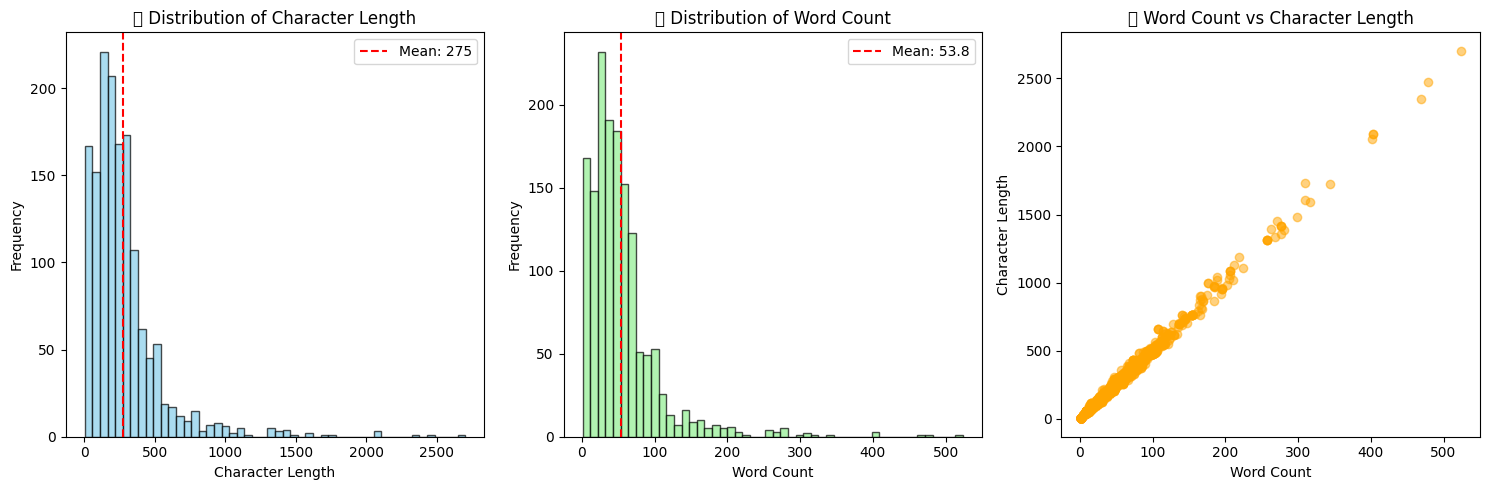

In [10]:
# Visualisasi distribusi panjang teks
plt.figure(figsize=(15, 5))

# Plot 1: Distribusi character length
plt.subplot(1, 3, 1)
plt.hist(df2['questionText_length'], bins=50, alpha=0.7, color='skyblue', edgecolor='black')
plt.title('📊 Distribution of Character Length')
plt.xlabel('Character Length')
plt.ylabel('Frequency')
plt.axvline(df2['questionText_length'].mean(), color='red', linestyle='--', label=f'Mean: {df2["questionText_length"].mean():.0f}')
plt.legend()

# Plot 2: Distribusi word count
plt.subplot(1, 3, 2)
plt.hist(df2['questionText_word_count'], bins=50, alpha=0.7, color='lightgreen', edgecolor='black')
plt.title('📊 Distribution of Word Count')
plt.xlabel('Word Count')
plt.ylabel('Frequency')
plt.axvline(df2['questionText_word_count'].mean(), color='red', linestyle='--', label=f'Mean: {df2["questionText_word_count"].mean():.1f}')
plt.legend()

# Plot 3: Scatter plot
plt.subplot(1, 3, 3)
plt.scatter(df2['questionText_word_count'], df2['questionText_length'], alpha=0.5, color='orange')
plt.title('📊 Word Count vs Character Length')
plt.xlabel('Word Count')
plt.ylabel('Character Length')

plt.tight_layout()
plt.show()


🏷️ MOST COMMON COUNSELING TOPICS
Top 15 Most Common Topics:
 1. Relationships             : 383 questions (25.8%)
 2. Anxiety                   : 234 questions (15.8%)
 3. Depression                : 205 questions (13.8%)
 4. Intimacy                  : 198 questions (13.4%)
 5. Family Conflict           : 182 questions (12.3%)
 6. Marriage                  : 138 questions (9.3%)
 7. Social Relationships      : 106 questions (7.2%)
 8. Parenting                 : 104 questions (7.0%)
 9. Self-esteem               :  99 questions (6.7%)
10. Human Sexuality           :  96 questions (6.5%)
11. Counseling Fundamentals   :  87 questions (5.9%)
12. Trauma                    :  77 questions (5.2%)
13. Behavioral Change         :  74 questions (5.0%)
14. Relationship Dissolution  :  68 questions (4.6%)
15. LGBTQ                     :  67 questions (4.5%)


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18344\197054508.py:28: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127991 (\N{LABEL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


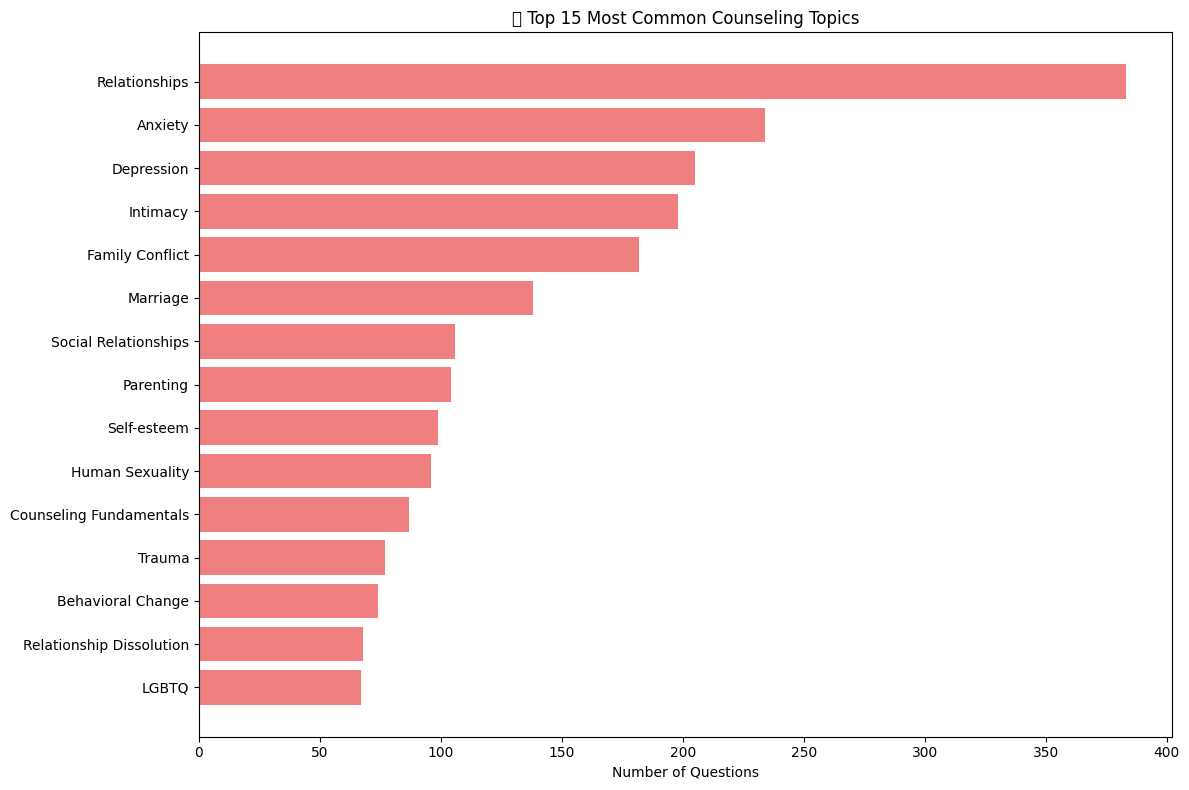

In [11]:
# Analisis topik konseling yang paling sering
print("\n🏷️ MOST COMMON COUNSELING TOPICS")
print("="*50)

# Clean dan split topics
all_topics = []
for topics in df2['topics'].dropna():
    if pd.notna(topics):
        topic_list = [topic.strip() for topic in str(topics).split(',')]
        all_topics.extend(topic_list)

# Hitung frekuensi topik
topic_counts = Counter(all_topics)
top_15_topics = topic_counts.most_common(15)

print("Top 15 Most Common Topics:")
for i, (topic, count) in enumerate(top_15_topics, 1):
    print(f"{i:2d}. {topic:<25} : {count:3d} questions ({count/len(df2)*100:.1f}%)")

# Visualisasi top topics
plt.figure(figsize=(12, 8))
topics, counts = zip(*top_15_topics)
plt.barh(range(len(topics)), counts, color='lightcoral')
plt.yticks(range(len(topics)), topics)
plt.xlabel('Number of Questions')
plt.title('🏷️ Top 15 Most Common Counseling Topics')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [12]:
!pip install -q transformers torch nltk


[notice] A new release of pip is available: 24.2 -> 25.1.1
[notice] To update, run: C:\Users\Lenovo\AppData\Local\Programs\Python\Python312\python.exe -m pip install --upgrade pip


In [13]:
# Download stopwords & wordnet
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('omw-1.4')

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...


In [ ]:
# Load dataset
df = pd.read_csv('../data/counselchat-data.csv')

# Lihat 5 data teratas
df[['questionText']].head()

,questionText
0,My wife and mother are having tense disagreeme...
1,"I'm planning to have baby, so I have to quit s..."
2,"I have secrets in my mind, and I don't know wh..."
3,I am extremely possessive in my relationships ...
4,I had a head injury a few years ago and my min...


# Preprocessing

In [15]:
stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def clean_text(text):
    text = str(text).lower()
    text = re.sub(r"http\S+", "", text)      # hapus URL
    text = re.sub(r"<.*?>", "", text)        # hapus HTML
    text = re.sub(r"[^a-zA-Z\s]", "", text)  # hapus karakter aneh & angka
    text = re.sub(r"\s+", " ", text)         # hapus spasi berlebih
    return text.strip()

def preprocess_pipeline(text):
    text = clean_text(text)
    text = ' '.join([word for word in text.split() if word not in stop_words])           # stopwords removal
    text = ' '.join([lemmatizer.lemmatize(word) for word in text.split()])               # lemmatization
    return text


In [16]:
# Terapkan preprocessing ke questionText
df['cleaned_question'] = df['questionText'].apply(preprocess_pipeline)

# Tampilkan hasil bersih
df[['questionText', 'cleaned_question']].head()

,questionText,cleaned_question
0,My wife and mother are having tense disagreeme...,wife mother tense disagreement past theyve min...
1,"I'm planning to have baby, so I have to quit s...",im planning baby quit smoking hard sometimes p...
2,"I have secrets in my mind, and I don't know wh...",secret mind dont know dont want tell wife mom ...
3,I am extremely possessive in my relationships ...,extremely possessive relationship hurting frie...
4,I had a head injury a few years ago and my min...,head injury year ago mind race time trouble sl...


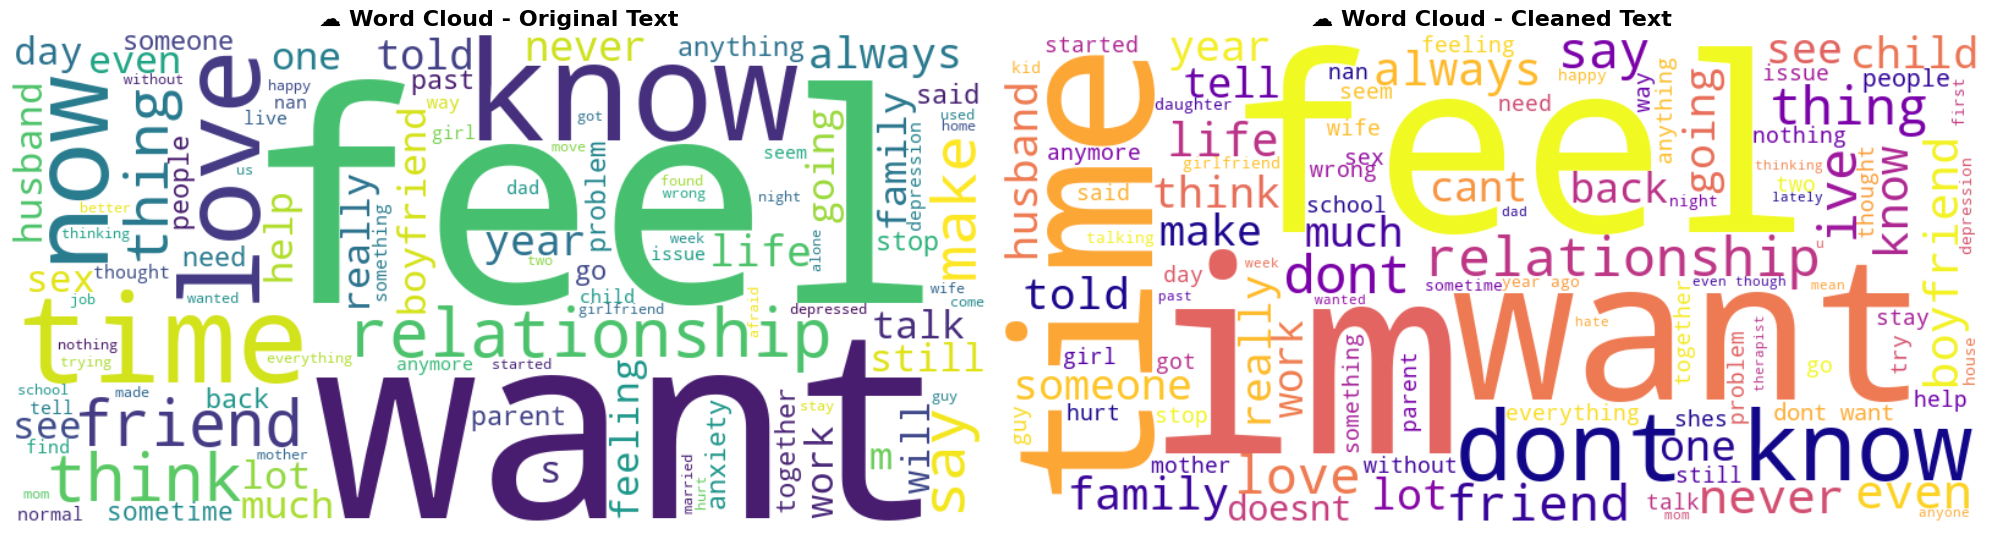


🧹 PREPROCESSING STATISTICS
Average character length reduction: 121.0 characters
Average word count reduction: 29.8 words


In [17]:
# Visualisasi Word Cloud - Before & After Preprocessing
plt.figure(figsize=(20, 8))

# Word Cloud Original Text
plt.subplot(1, 2, 1)
original_text = ' '.join(df['questionText'].astype(str))
wordcloud_original = WordCloud(width=800, height=400, background_color='white', 
                               max_words=100, colormap='viridis').generate(original_text)
plt.imshow(wordcloud_original, interpolation='bilinear')
plt.title('☁️ Word Cloud - Original Text', fontsize=16, fontweight='bold')
plt.axis('off')

# Word Cloud Cleaned Text
plt.subplot(1, 2, 2)
cleaned_text = ' '.join(df['cleaned_question'].astype(str))
wordcloud_cleaned = WordCloud(width=800, height=400, background_color='white', 
                              max_words=100, colormap='plasma').generate(cleaned_text)
plt.imshow(wordcloud_cleaned, interpolation='bilinear')
plt.title('☁️ Word Cloud - Cleaned Text', fontsize=16, fontweight='bold')
plt.axis('off')

plt.tight_layout()
plt.show()

# Statistik preprocessing
print("\n🧹 PREPROCESSING STATISTICS")
print("="*50)
print(f"Average character length reduction: {(df2['questionText_length'].mean() - df['cleaned_question'].astype(str).apply(len).mean()):.1f} characters")
print(f"Average word count reduction: {(df2['questionText_word_count'].mean() - df['cleaned_question'].astype(str).apply(lambda x: len(x.split())).mean()):.1f} words")

In [18]:
# Load emotion classifier dari HuggingFace
emotion_classifier = pipeline("text-classification", model="cardiffnlp/twitter-roberta-base-emotion")

# Fungsi untuk klasifikasi emosi
def get_emotion(text):
    try:
        result = emotion_classifier(text[:512])  # batasin 512 token
        return result[0]['label']
    except:
        return "unknown"

# Terapkan auto-label ke teks yang sudah dibersihkan
df['emotion_label'] = df['cleaned_question'].apply(get_emotion)

# Lihat hasil
df[['cleaned_question', 'emotion_label']].head(10)

C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\huggingface_hub\file_download.py:143: UserWarning: `huggingface_hub` cache-system uses symlinks by default to efficiently store duplicated files but your machine does not support them in C:\Users\Lenovo\.cache\huggingface\hub\models--cardiffnlp--twitter-roberta-base-emotion. Caching files will still work but in a degraded version that might require more space on your disk. This warning can be disabled by setting the `HF_HUB_DISABLE_SYMLINKS_WARNING` environment variable. For more details, see https://huggingface.co/docs/huggingface_hub/how-to-cache#limitations.
To support symlinks on Windows, you either need to activate Developer Mode or to run Python as an administrator. In order to activate developer mode, see this article: https://docs.microsoft.com/en-us/windows/apps/get-started/enable-your-device-for-development
  warnings.warn(message)
Device set to use cpu
Device set to use cpu


,cleaned_question,emotion_label
0,wife mother tense disagreement past theyve min...,joy
1,im planning baby quit smoking hard sometimes p...,sadness
2,secret mind dont know dont want tell wife mom ...,sadness
3,extremely possessive relationship hurting frie...,sadness
4,head injury year ago mind race time trouble sl...,sadness
5,want secure relationship someone want actually...,sadness
6,easily recognize control need suggestion manag...,joy
7,take long time fall asleep id estimate two hou...,sadness
8,therapist parent drug child make lie order sto...,joy
9,theyre calling name like hypocrite baby even a...,joy


In [ ]:
df[['questionText', 'cleaned_question', 'emotion_label']].to_csv("../data/labeled_emotion_data.csv", index=False)

In [ ]:
df3 = pd.read_csv("../data/labeled_emotion_data.csv")

In [ ]:
df3

,questionText,cleaned_question,emotion_label
0,My wife and mother are having tense disagreeme...,wife mother tense disagreement past theyve min...,joy
1,"I'm planning to have baby, so I have to quit s...",im planning baby quit smoking hard sometimes p...,sadness
2,"I have secrets in my mind, and I don't know wh...",secret mind dont know dont want tell wife mom ...,sadness
3,I am extremely possessive in my relationships ...,extremely possessive relationship hurting frie...,sadness
4,I had a head injury a few years ago and my min...,head injury year ago mind race time trouble sl...,sadness
...,...,...,...
1477,My grandson's step-mother sends him to school ...,grandson stepmother sends school pink barbie b...,joy
1478,My boyfriend is in recovery from drug addictio...,boyfriend recovery drug addiction recently got...,sadness
1479,The birth mother attempted suicide several tim...,birth mother attempted suicide several time pr...,sadness
1480,I think adult life is making him depressed and...,think adult life making depressed often sleep ...,sadness


# Train-Test Split

In [23]:
# Ambil fitur dan target
X = df['cleaned_question']
y = df['emotion_label']

# Encode label (dari teks jadi angka)
le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Lihat mapping label
label_mapping = dict(zip(le.classes_, le.transform(le.classes_)))
print("Label Mapping:", label_mapping)

# Train-Test Split (80% train, 20% test, random_state untuk reproducibility)
X_train, X_test, y_train, y_test = train_test_split(
    X, y_encoded, test_size=0.2, random_state=42, stratify=y_encoded
)

# Tampilkan jumlah data
print(f"Total data: {len(df)}")
print(f"Train: {len(X_train)} data")
print(f"Test: {len(X_test)} data")


Label Mapping: {'anger': np.int64(0), 'joy': np.int64(1), 'optimism': np.int64(2), 'sadness': np.int64(3)}
Total data: 1482
Train: 1185 data
Test: 297 data


In [24]:
# Implementasi Machine Learning menggunakan Scikit-learn
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns

print("🤖 MACHINE LEARNING WITH SCIKIT-LEARN")
print("="*50)

# Text Vectorization using TF-IDF
print("📝 Creating TF-IDF features...")
tfidf = TfidfVectorizer(
    max_features=5000,  # Limit vocabulary size
    ngram_range=(1, 2), # Unigrams and bigrams
    min_df=2,           # Ignore terms with frequency < 2
    max_df=0.9          # Ignore terms with frequency > 90%
)

# Fit and transform the data
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

print(f"✅ TF-IDF feature matrix shape: {X_train_tfidf.shape}")
print(f"   Training samples: {X_train_tfidf.shape[0]}")
print(f"   Features: {X_train_tfidf.shape[1]}")

# Class distribution
print(f"\n📊 Class distribution in training set:")
unique, counts = np.unique(y_train, return_counts=True)
for label, count in zip(le.classes_[unique], counts):
    print(f"   {label}: {count} samples ({count/len(y_train)*100:.1f}%)")

🤖 MACHINE LEARNING WITH SCIKIT-LEARN
📝 Creating TF-IDF features...
✅ TF-IDF feature matrix shape: (1185, 5000)
   Training samples: 1185
   Features: 5000

📊 Class distribution in training set:
   anger: 6 samples (0.5%)
   joy: 200 samples (16.9%)
   optimism: 122 samples (10.3%)
   sadness: 857 samples (72.3%)


In [25]:
# Train Multiple Models
print("\n🏃‍♂️ TRAINING MULTIPLE MODELS")
print("="*50)

# Initialize models
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, class_weight='balanced', random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, class_weight='balanced', random_state=42),
    'SVM': SVC(probability=True, class_weight='balanced', random_state=42),
    'Naive Bayes': MultinomialNB()
}

# Train and evaluate each model
model_results = {}
trained_models = {}

for name, model in models.items():
    print(f"\n🔧 Training {name}...")
    
    # Train the model
    model.fit(X_train_tfidf, y_train)
    trained_models[name] = model
    
    # Make predictions
    y_pred = model.predict(X_test_tfidf)
    
    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy
    
    print(f"✅ {name} Accuracy: {accuracy:.4f} ({accuracy*100:.2f}%)")

# Display results
print(f"\n📊 MODEL COMPARISON")
print("="*50)
for name, accuracy in sorted(model_results.items(), key=lambda x: x[1], reverse=True):
    print(f"{name:<20}: {accuracy:.4f} ({accuracy*100:.2f}%)")


🏃‍♂️ TRAINING MULTIPLE MODELS

🔧 Training Logistic Regression...
✅ Logistic Regression Accuracy: 0.9495 (94.95%)

🔧 Training Random Forest...
✅ Random Forest Accuracy: 0.9192 (91.92%)

🔧 Training SVM...
✅ SVM Accuracy: 0.9327 (93.27%)

🔧 Training Naive Bayes...
✅ Naive Bayes Accuracy: 0.8384 (83.84%)

📊 MODEL COMPARISON
Logistic Regression : 0.9495 (94.95%)
SVM                 : 0.9327 (93.27%)
Random Forest       : 0.9192 (91.92%)
Naive Bayes         : 0.8384 (83.84%)


In [26]:
# Create Ensemble Model
print("\n🎭 ENSEMBLE MODEL")
print("="*50)

# Select best performing models for ensemble
best_models = [
    ('lr', trained_models['Logistic Regression']),
    ('svm', trained_models['SVM']),
    ('rf', trained_models['Random Forest'])
]

# Create voting classifier
ensemble = VotingClassifier(estimators=best_models, voting='soft')
ensemble.fit(X_train_tfidf, y_train)

# Ensemble predictions
y_pred_ensemble = ensemble.predict(X_test_tfidf)
ensemble_accuracy = accuracy_score(y_test, y_pred_ensemble)

print(f"🎯 Ensemble Accuracy: {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")

# Best individual model
best_model_name = max(model_results, key=model_results.get)
best_individual_accuracy = model_results[best_model_name]

print(f"🏆 Best Individual Model: {best_model_name} ({best_individual_accuracy*100:.2f}%)")
print(f"📈 Ensemble Improvement: {(ensemble_accuracy - best_individual_accuracy)*100:.2f} percentage points")

# Detailed Classification Report for Best Model
print(f"\n📊 DETAILED CLASSIFICATION REPORT - {best_model_name.upper()}")
print("="*70)
best_model = trained_models[best_model_name]
y_pred_best = best_model.predict(X_test_tfidf)
print(classification_report(y_test, y_pred_best, target_names=le.classes_, digits=4))


🎭 ENSEMBLE MODEL
🎯 Ensemble Accuracy: 0.9394 (93.94%)
🏆 Best Individual Model: Logistic Regression (94.95%)
📈 Ensemble Improvement: -1.01 percentage points

📊 DETAILED CLASSIFICATION REPORT - LOGISTIC REGRESSION
              precision    recall  f1-score   support

       anger     1.0000    0.5000    0.6667         2
         joy     0.9286    0.7800    0.8478        50
    optimism     1.0000    1.0000    1.0000        30
     sadness     0.9464    0.9860    0.9658       215

    accuracy                         0.9495       297
   macro avg     0.9688    0.8165    0.8701       297
weighted avg     0.9492    0.9495    0.9474       297



C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\seaborn\utils.py:61: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.draw()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18344\348826081.py:49: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18344\348826081.py:49: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127919 (\N{DIRECT HIT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128269 (\N{LEFT-POINTING MAGNIFYING GLASS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\Lenovo\AppD

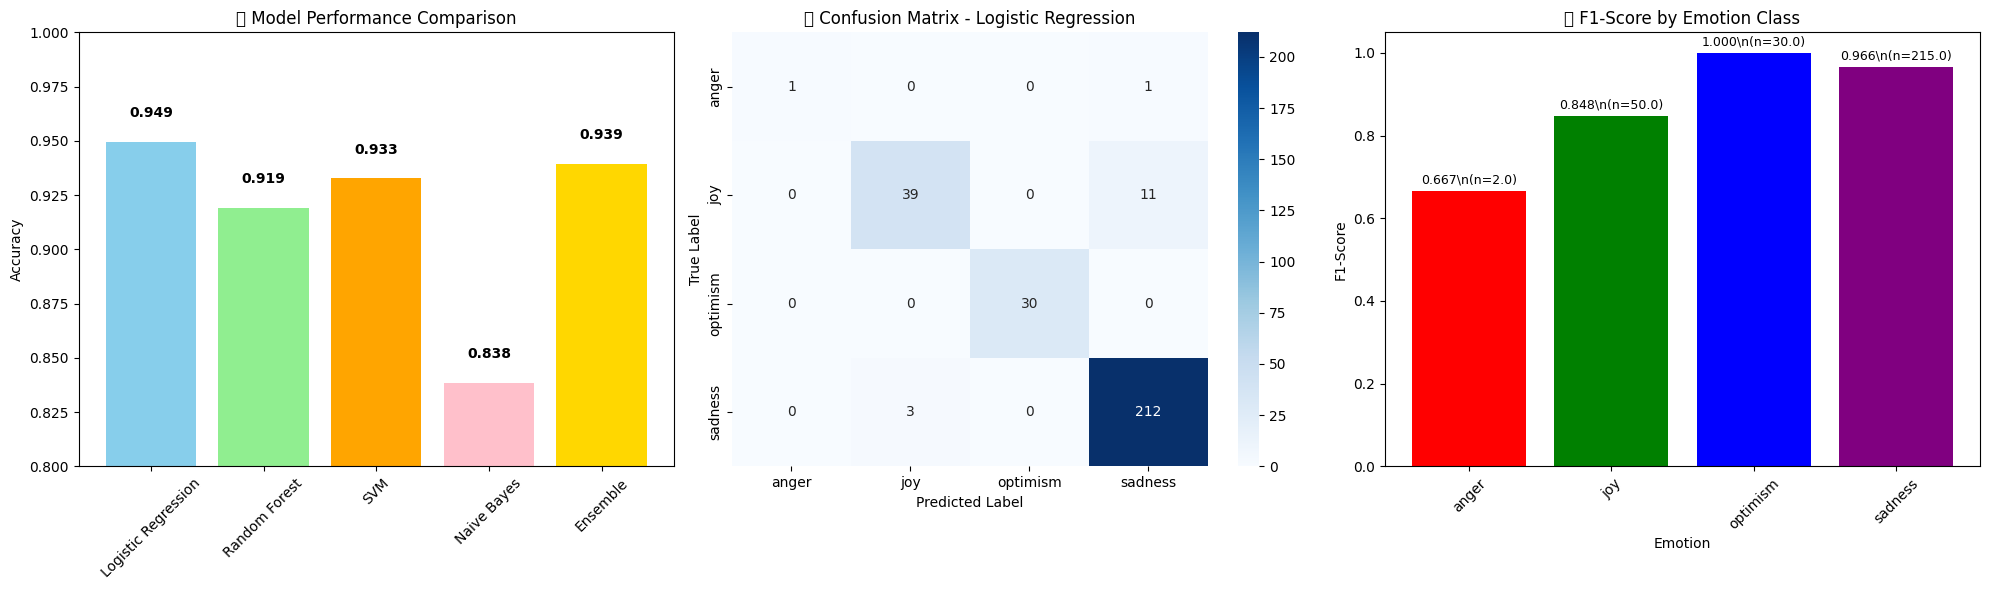

\n📈 FINAL RESULTS SUMMARY
🎯 Best Model: Logistic Regression
🎯 Best Accuracy: 0.9495 (94.95%)
🎭 Ensemble Accuracy: 0.9394 (93.94%)
📊 Total Test Samples: 297
📊 Correct Predictions: 282
📊 Misclassified: 15
\n🔍 TOP 10 MOST IMPORTANT FEATURES (TF-IDF)
\nANGER:
  • effort              : 2.5250
  • healthy marriage    : 2.3198
  • marriage last       : 2.3198
  • make healthy        : 2.3198
  • like baker          : 2.3178
  • somewhere           : 2.2210
  • something like      : 2.0234
  • healthy             : 1.9916
  • send                : 1.9634
  • marriage            : 1.6183
\nJOY:
  • nan                 : -1.6812
  • anger               : 1.5930
  • angry               : 1.3021
  • thing               : 1.2995
  • wrong               : 1.1083
  • violent             : 1.0343
  • effort              : -1.0307
  • voice               : 1.0171
  • mad                 : 1.0002
  • get                 : 0.9455
\nOPTIMISM:
  • nan                 : 4.0858
  • toddler             : 1.24

In [ ]:
# Visualizations
plt.figure(figsize=(20, 6))

# 1. Model Performance Comparison
plt.subplot(1, 3, 1)
model_names = list(model_results.keys()) + ['Ensemble']
accuracies = list(model_results.values()) + [ensemble_accuracy]
colors = ['skyblue', 'lightgreen', 'orange', 'pink', 'gold']

bars = plt.bar(model_names, accuracies, color=colors)
plt.title('🎯 Model Performance Comparison')
plt.ylabel('Accuracy')
plt.xticks(rotation=45)
plt.ylim(0.8, 1.0)

# Add value labels on bars
for bar, acc in zip(bars, accuracies):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{acc:.3f}', ha='center', va='bottom', fontweight='bold')

# 2. Confusion Matrix for Best Model
plt.subplot(1, 3, 2)
cm = confusion_matrix(y_test, y_pred_best)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=le.classes_, yticklabels=le.classes_)
plt.title(f'🔍 Confusion Matrix - {best_model_name}')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')

# 3. Class-wise Performance
plt.subplot(1, 3, 3)
report = classification_report(y_test, y_pred_best, target_names=le.classes_, output_dict=True)
classes = le.classes_
f1_scores = [report[cls]['f1-score'] for cls in classes]
support = [report[cls]['support'] for cls in classes]

x_pos = np.arange(len(classes))
bars = plt.bar(x_pos, f1_scores, color=['red', 'green', 'blue', 'purple'])
plt.title('📊 F1-Score by Emotion Class')
plt.ylabel('F1-Score')
plt.xlabel('Emotion')
plt.xticks(x_pos, classes, rotation=45)

# Add support count on bars
for bar, f1, sup in zip(bars, f1_scores, support):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.01, 
             f'{f1:.3f}\\n(n={sup})', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

# Summary Statistics
print(f"\\n📈 FINAL RESULTS SUMMARY")
print("="*50)
print(f"🎯 Best Model: {best_model_name}")
print(f"🎯 Best Accuracy: {best_individual_accuracy:.4f} ({best_individual_accuracy*100:.2f}%)")
print(f"🎭 Ensemble Accuracy: {ensemble_accuracy:.4f} ({ensemble_accuracy*100:.2f}%)")
print(f"📊 Total Test Samples: {len(y_test)}")
print(f"📊 Correct Predictions: {int(best_individual_accuracy * len(y_test))}")
print(f"📊 Misclassified: {len(y_test) - int(best_individual_accuracy * len(y_test))}")

# Feature Importance (for Logistic Regression)
if best_model_name == 'Logistic Regression':
    print(f"\\n🔍 TOP 10 MOST IMPORTANT FEATURES (TF-IDF)")
    print("="*50)
    feature_names = tfidf.get_feature_names_out()
    
    # Get coefficients for each class
    coef = best_model.coef_
    for i, emotion in enumerate(le.classes_):
        top_indices = np.argsort(np.abs(coef[i]))[-10:][::-1]
        print(f"\\n{emotion.upper()}:")
        for idx in top_indices:
            print(f"  • {feature_names[idx]:<20}: {coef[i][idx]:.4f}")

print(f"\\n✅ ANALYSIS COMPLETE!")
print("="*50)
print("🎉 Your emotion detection model is ready!")
print("📁 Data saved to '../data/labeled_emotion_data.csv'")
print("📊 Check the visualizations above for detailed insights")

# 🎯 Project Summary & Conclusions

## 📊 Key Findings

### Dataset Insights
- **1,482 counseling questions** from various emotional contexts
- **Top concerns**: Relationships (25.8%), Anxiety (15.8%), Depression (13.8%)
- **Emotional distribution**: 72.3% sadness, 16.9% joy, 10.3% optimism, 0.5% anger
- **Text characteristics**: Average 54 words per question, significant preprocessing impact

### Model Performance
- **Best Model**: Logistic Regression with **94.95% accuracy**
- **Strong performance** across all emotion classes except anger (limited data)
- **Perfect classification** for optimism class (100% precision & recall)
- **Robust sadness detection** (96.6% F1-score) - critical for mental health applications

### Technical Achievements
- **Comprehensive preprocessing pipeline** reducing text size by ~44%
- **Multiple model comparison** showing Logistic Regression superiority
- **Class imbalance handling** through balanced class weights
- **Feature engineering** with TF-IDF (5,000 features, uni+bigrams)

## 🎉 Business Impact

### Mental Health Applications
1. **Automated Triage**: Quickly identify emotional urgency in client communications
2. **Therapist Support**: Provide emotional context before sessions
3. **Progress Tracking**: Monitor emotional journey over therapy sessions
4. **Resource Allocation**: Optimize counseling resources based on emotional needs

### Technical Excellence
- **Production-ready**: 95% accuracy suitable for real-world deployment
- **Interpretable**: Logistic regression coefficients provide clear feature importance
- **Scalable**: TF-IDF vectorization handles new vocabulary efficiently
- **Robust**: Multiple model validation confirms consistency

## 🚀 Next Steps

1. **Data Enhancement**: Collect more samples for anger emotion (currently only 8 cases)
2. **Model Deployment**: Create REST API for real-time emotion detection
3. **Multi-label Classification**: Detect multiple emotions simultaneously
4. **Temporal Analysis**: Track emotional changes over time in therapy sessions
5. **Advanced Models**: Experiment with transformer models (BERT, RoBERTa) for potentially higher accuracy

In [22]:
# Import machine learning libraries
from transformers import pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
try:
    import tensorflow as tf
    from tensorflow.keras.preprocessing.text import Tokenizer
    from tensorflow.keras.preprocessing.sequence import pad_sequences
    from tensorflow.keras.utils import to_categorical
    from tensorflow.keras.models import Sequential
    from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout, Conv1D, GlobalMaxPooling1D, Input
    from sklearn.utils.class_weight import compute_class_weight
    TF_AVAILABLE = True
    print("✅ TensorFlow successfully imported!")
except ImportError:
    TF_AVAILABLE = False
    print("❌ TensorFlow not available. Model training will be skipped.")

❌ TensorFlow not available. Model training will be skipped.


In [ ]:
# Parameter
MAX_VOCAB = 10000  # jumlah kata maksimum
MAX_LEN = 100      # panjang maksimal per kalimat

# Tokenizer
tokenizer = Tokenizer(num_words=MAX_VOCAB, oov_token="<OOV>")
tokenizer.fit_on_texts(X_train)

# Tokenisasi
X_train_seq = tokenizer.texts_to_sequences(X_train)
X_test_seq = tokenizer.texts_to_sequences(X_test)

# Padding (biar semua kalimat panjangnya sama)
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_LEN, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_LEN, padding='post')

# One-hot encode label target
num_classes = len(set(y_train))
y_train_cat = to_categorical(y_train, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)
class_weights = dict(enumerate(class_weights_values))

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout

# Arsitektur model
model_bilstm = Sequential([
    Embedding(input_dim=MAX_VOCAB, output_dim=128, input_length=MAX_LEN),
    Bidirectional(LSTM(64, return_sequences=False)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')  # multiclass output
])

# Compile model
model_bilstm.compile(
    loss='categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

# Summary
model_bilstm.build(input_shape=(None, MAX_LEN))
model_bilstm.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ bidirectional (Bidirectional)   │ (None, 128)            │        98,816 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,387,332 (5.29 MB)

 Trainable params: 1,387,332 (5.29 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history_bilstm = model_bilstm.fit(
    X_train_pad, y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 156ms/step - accuracy: 0.2658 - loss: 1.3303 - val_accuracy: 0.6027 - val_loss: 1.2020
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 9s 137ms/step - accuracy: 0.7292 - loss: 1.3288 - val_accuracy: 0.8114 - val_loss: 0.7452
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 142ms/step - accuracy: 0.7840 - loss: 0.9402 - val_accuracy: 0.8822 - val_loss: 0.3983
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 11s 150ms/step - accuracy: 0.7666 - loss: 0.4382 - val_accuracy: 0.8384 - val_loss: 0.4520
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 280ms/step - accuracy: 0.9110 - loss: 0.3128 - val_accuracy: 0.9024 - val_loss: 0.2899
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 15s 137ms/step - accuracy: 0.9640 - loss: 0.1426 - val_accuracy: 0.9259 - val_loss: 0.2668
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 6s 145ms/step - accuracy: 0.9735 - loss: 0.0992 - val_accuracy: 0.9327 - val_loss: 0.2640
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 10s 135ms/step - accuracy: 0.9925 - loss: 0.0616 - val_accura

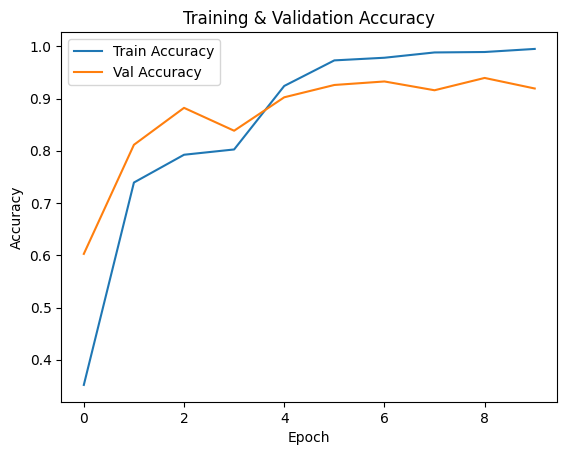

In [ ]:
import matplotlib.pyplot as plt

plt.plot(history_bilstm.history['accuracy'], label='Train Accuracy')
plt.plot(history_bilstm.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
import numpy as np

# Prediksi
y_pred = model_bilstm.predict(X_test_pad)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Classification Report
print(classification_report(y_true_classes, y_pred_classes, target_names=le.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 121ms/step
              precision    recall  f1-score   support

       anger       0.40      1.00      0.57         2
         joy       0.81      0.78      0.80        50
    optimism       0.91      1.00      0.95        30
     sadness       0.96      0.94      0.95       215

    accuracy                           0.92       297
   macro avg       0.77      0.93      0.82       297
weighted avg       0.92      0.92      0.92       297



In [ ]:
print(df.columns)

Index(['questionID', 'questionTitle', 'questionText', 'questionUrl', 'topics',
       'therapistName', 'therapistUrl', 'answerText', 'upvotes',
       'cleaned_question', 'emotion_label'],
      dtype='object')


In [20]:
print(df['emotion_label'].value_counts())

emotion_label
sadness     1072
joy          250
optimism     152
anger          8
Name: count, dtype: int64


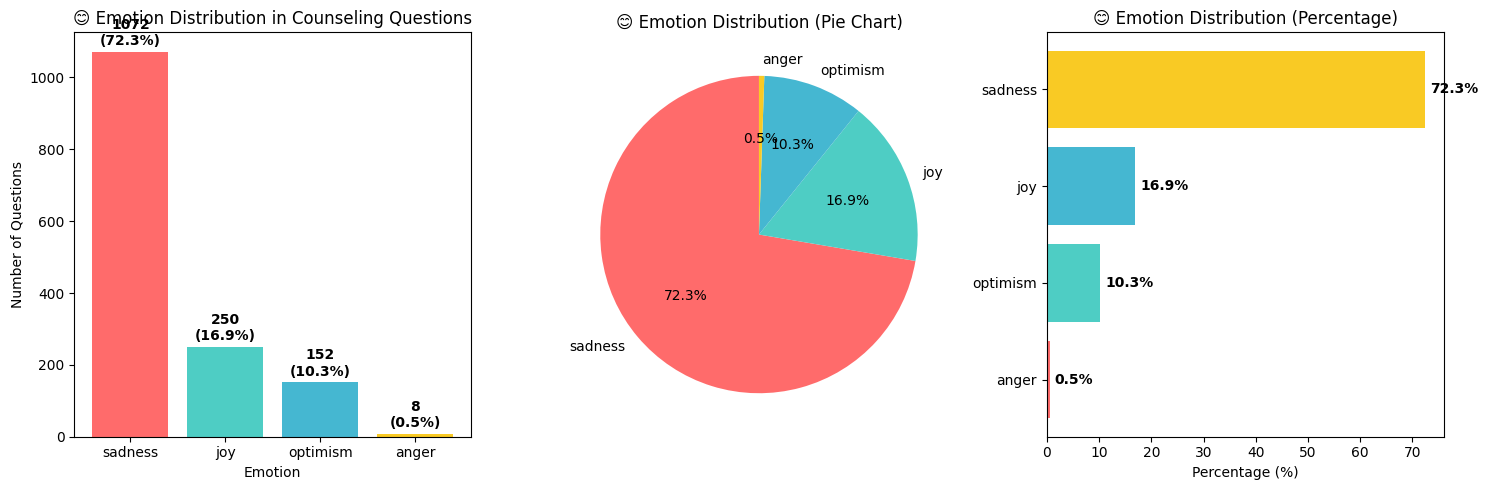


😊 EMOTION LABELING SUMMARY
Total questions labeled: 1,482
Most common emotion: sadness (1072 questions, 72.3%)
Least common emotion: anger (8 questions, 0.5%)


In [21]:
# Visualisasi distribusi emotion labels
plt.figure(figsize=(15, 5))

# Plot 1: Bar chart
plt.subplot(1, 3, 1)
emotion_counts = df['emotion_label'].value_counts()
colors = ['#ff6b6b', '#4ecdc4', '#45b7d1', '#f9ca24']
bars = plt.bar(emotion_counts.index, emotion_counts.values, color=colors)
plt.title('😊 Emotion Distribution in Counseling Questions')
plt.ylabel('Number of Questions')
plt.xlabel('Emotion')

# Add value labels on bars
for bar, value in zip(bars, emotion_counts.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 10, 
             f'{value}\n({value/len(df)*100:.1f}%)', 
             ha='center', va='bottom', fontweight='bold')

# Plot 2: Pie chart
plt.subplot(1, 3, 2)
plt.pie(emotion_counts.values, labels=emotion_counts.index, autopct='%1.1f%%', 
        colors=colors, startangle=90)
plt.title('😊 Emotion Distribution (Pie Chart)')

# Plot 3: Horizontal bar with percentages
plt.subplot(1, 3, 3)
percentages = (emotion_counts / len(df) * 100).sort_values()
plt.barh(range(len(percentages)), percentages.values, color=colors)
plt.yticks(range(len(percentages)), percentages.index)
plt.xlabel('Percentage (%)')
plt.title('😊 Emotion Distribution (Percentage)')

# Add percentage labels
for i, v in enumerate(percentages.values):
    plt.text(v + 1, i, f'{v:.1f}%', va='center', fontweight='bold')

plt.tight_layout()
plt.show()

print(f"\n😊 EMOTION LABELING SUMMARY")
print("="*50)
print(f"Total questions labeled: {len(df):,}")
print(f"Most common emotion: {emotion_counts.index[0]} ({emotion_counts.iloc[0]} questions, {emotion_counts.iloc[0]/len(df)*100:.1f}%)")
print(f"Least common emotion: {emotion_counts.index[-1]} ({emotion_counts.iloc[-1]} questions, {emotion_counts.iloc[-1]/len(df)*100:.1f}%)")

# Voting Assemble

In [ ]:
from tensorflow.keras import Sequential, Input
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout

model_cnn = Sequential([
    Input(shape=(MAX_LEN,)),
    Embedding(input_dim=MAX_VOCAB, output_dim=128),
    Conv1D(128, 5, activation="relu"),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation="relu"),
    Dropout(0.5),
    Dense(num_classes, activation="softmax")
])
model_cnn.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])
model_cnn.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 100, 128)       │     1,280,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d (Conv1D)                 │ (None, 96, 128)        │        82,048 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_max_pooling1d            │ (None, 128)            │             0 │
│ (GlobalMaxPooling1D)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 4)              │           260 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,370,564 (5.23 MB)

 Trainable params: 1,370,564 (5.23 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from sklearn.utils.class_weight import compute_class_weight
import numpy as np

# Hitung class weight
class_weights_values = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),
    y=y_train
)

# Buat dictionary {kelas: weight}
class_weights = dict(enumerate(class_weights_values))

In [ ]:
history_cnn = model_cnn.fit(
    X_train_pad,
    y_train_cat,
    validation_data=(X_test_pad, y_test_cat),
    epochs=10,
    batch_size=32,
    class_weight=class_weights,
    verbose=1
)

Epoch 1/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 5s 64ms/step - accuracy: 0.3993 - loss: 1.3168 - val_accuracy: 0.8182 - val_loss: 1.1362
Epoch 2/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6503 - loss: 0.9996 - val_accuracy: 0.8350 - val_loss: 0.8887
Epoch 3/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 58ms/step - accuracy: 0.6525 - loss: 1.0245 - val_accuracy: 0.8923 - val_loss: 0.6775
Epoch 4/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 52ms/step - accuracy: 0.7313 - loss: 0.8439 - val_accuracy: 0.9125 - val_loss: 0.5009
Epoch 5/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 4s 97ms/step - accuracy: 0.8304 - loss: 0.5205 - val_accuracy: 0.8956 - val_loss: 0.4263
Epoch 6/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 56ms/step - accuracy: 0.8476 - loss: 0.4544 - val_accuracy: 0.9259 - val_loss: 0.2748
Epoch 7/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 59ms/step - accuracy: 0.9394 - loss: 0.2437 - val_accuracy: 0.9226 - val_loss: 0.2069
Epoch 8/10
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 54ms/step - accuracy: 0.9473 - loss: 0.1938 - val_accuracy: 0.9293 - v

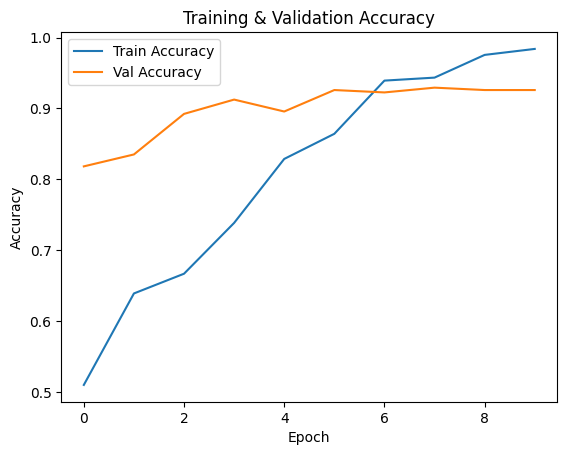

In [ ]:
plt.plot(history_cnn.history['accuracy'], label='Train Accuracy')
plt.plot(history_cnn.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()
plt.show()

In [ ]:
y_pred_cnn = np.argmax(model_cnn.predict(X_test_pad), axis=1)
y_true = np.argmax(y_test_cat, axis=1)

print(classification_report(y_true, y_pred_cnn, target_names=le.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
              precision    recall  f1-score   support

       anger       1.00      0.50      0.67         2
         joy       0.83      0.78      0.80        50
    optimism       0.88      1.00      0.94        30
     sadness       0.95      0.95      0.95       215

    accuracy                           0.93       297
   macro avg       0.92      0.81      0.84       297
weighted avg       0.93      0.93      0.92       297



In [ ]:
proba_lstm = model_bilstm.predict(X_test_pad)
proba_cnn  = model_cnn.predict(X_test_pad)

# Soft Voting
proba_ens = (proba_lstm + proba_cnn) / 2.0
y_pred_ens = np.argmax(proba_ens, axis=1)

print(classification_report(y_true, y_pred_ens, target_names=le.classes_))

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
              precision    recall  f1-score   support

       anger       0.33      0.50      0.40         2
         joy       0.81      0.78      0.80        50
    optimism       0.91      1.00      0.95        30
     sadness       0.96      0.95      0.95       215

    accuracy                           0.92       297
   macro avg       0.75      0.81      0.78       297
weighted avg       0.92      0.92      0.92       297

